In [7]:
import sys
import os

#Data manipulation libs
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.impute import KNNImputer

In [2]:
dataset=pd.read_csv('data/tabela_cmo_antigo.csv',sep=';')
dataset_cols=['value']


for col in dataset_cols:
    # dataset_consolidados[col]=dataset_consolidados[col].fillna(method='ffill')
    load= pd.DataFrame(dataset[col]) #choose any data to fill

    # Reshaping the data for k-NN
    X = load.values.reshape(-1, 1)  # Reshape data into a 2D array as expected by k-NN


    imputer = KNNImputer(n_neighbors=100)  # You can experiment with different numbers for n_neighbors
    X_imputed = imputer.fit_transform(X)  # Perform the imputation

    # Convert back to a pandas series for easy handling
    load_imputed = pd.Series(X_imputed.flatten(), index=dataset.index)


    dataset[col]=load_imputed.values

print("Max count nan:{}\n Mean count nan:{}\n".format( (dataset.isna().sum()).max(),\
                                                      (dataset.isna().sum()).mean()))


Max count nan:16016
 Mean count nan:7280.0



In [3]:
cat=dataset['category'].unique()
cat

array(['custo marginal de operacao (cmo) - carga leve',
       'custo marginal de operacao (cmo) - carga media',
       'custo marginal de operacao (cmo) - carga pesada',
       'custo marginal de operacao (cmo) - media semanal',
       'custo marginal de operacao (cmo) - nordeste',
       'custo marginal de operacao (cmo) - norte',
       'custo marginal de operacao (cmo) - sudeste/centro-oeste',
       'custo marginal de operacao (cmo) - sul'], dtype=object)

# Custo Marginal de Operação (CMO) - carga média semanal (SE/CO)

In [4]:
CMO_week=dataset.groupby('category').get_group(cat[3])

In [5]:
CMO_week_seco=CMO_week.groupby('subsystem').get_group('sudeste/centro-oeste').reset_index(drop=True)
CMO_week_nordeste=CMO_week.groupby('subsystem').get_group('nordeste').reset_index(drop=True)
CMO_week_norte=CMO_week.groupby('subsystem').get_group('norte').reset_index(drop=True)

CMO_week_seco=CMO_week_seco[CMO_week_seco['eventdate']<'2021-05-29 00:00:00']
CMO_week_nordeste=CMO_week_nordeste[CMO_week_nordeste['eventdate']<'2021-05-29 00:00:00']
CMO_week_norte=CMO_week_norte[CMO_week_norte['eventdate']<'2021-05-29 00:00:00']

In [9]:
CMO_week_seco.to_csv("data/treated_seco.csv")

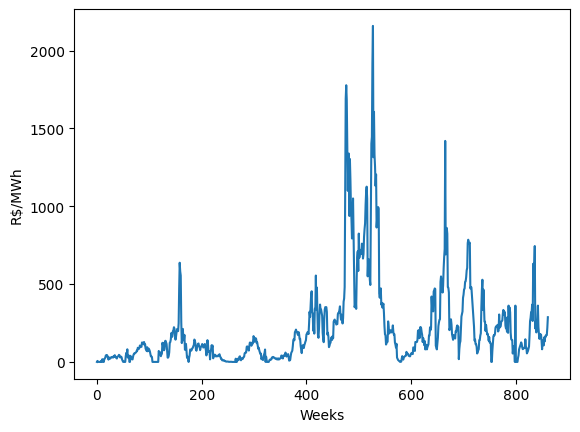

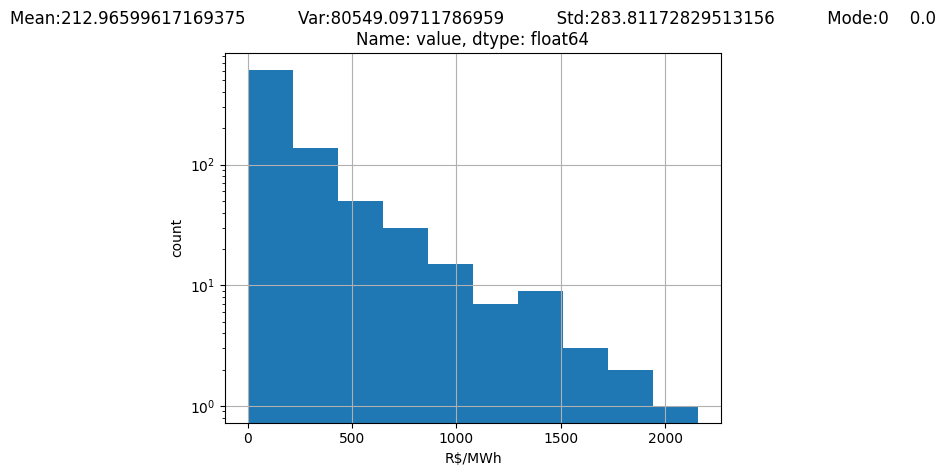

In [8]:
CMO_week_seco['value'].plot()
plt.xlabel('Weeks')
plt.ylabel('R$/MWh')
plt.show()


CMO_week_seco['value'].hist()
plt.yscale('log')
plt.ylabel('count')
plt.xlabel('R$/MWh')
plt.title(f"Mean:{CMO_week_seco['value'].mean()}\
          Var:{CMO_week_seco['value'].var()}\
          Std:{CMO_week_seco['value'].std()}\
          Mode:{CMO_week_seco['value'].mode()}")
plt.show()
